In [22]:
# code to load MEaSUREs Phase-Based Antarctica Ice Velocity Map
# netcdf file, calculate velocity magnitude and plot
#
# written 2020/10 by W. Sauthoff (wilson.sauthoff@gmail.com)

# import packages
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# define data directory (replace with your data directory file path)
data_dir = '/Volumes/Elements/datasets/velocity/'

In [13]:
# download MEaSUREs Phase-Based Antarctica Ice Velocity Map, Version 1 from: 
# https://nsidc.org/data/NSIDC-0754/versions/1

# load velocity file as variable (adjust enclosing folder name and file name if needed)
measures_vel_path = os.path.join(data_dir, 'measures-phase_v1/antarctic_ice_vel_phase_map_v01.nc')

In [14]:
# format for rasterio loading netcdf
velocity_x='netcdf:'+ measures_vel_path + ':VX'
velocity_y='netcdf:'+ measures_vel_path + ':VY'

# load grids for x and y velocity vectors
src_vx=rio.open(velocity_x)
src_vy=rio.open(velocity_y)

In [15]:
# test points for sanity check on calculated velocity
# (three drill sites from WISSARD and SALSA)
coords=[[-295743.804392, -502137.677718],
       [-278502.862779,-561384.761658],
       [-173785.999994,-590925.999998]]

# Sample the VX and VY grids at the coordinate locations
vx_hat=np.array([x for x in src_vx.sample(coords)])
vy_hat=np.array([x for x in src_vy.sample(coords)])

# Calculate the vector magnitude at the sample points and print the result
v_hat=np.sqrt(np.power(vx_hat,2) + np.power(vy_hat,2))
print(v_hat)

[[242.26247]
 [353.7625 ]
 [348.50708]]


In [16]:
# read the velocity data to plot it with plt.imshow
VX=src_vx.read(1, masked=True) # read x magnitude
VY=src_vy.read(1, masked=True) # read y magnitude
bounds=src_vx.bounds # read the bounds of the raster (comes as left, bottom, right, top)

In [17]:
# Calculate the velocity magnitude
V_mag=np.sqrt(np.power(VX,2) + np.power(VY,2))

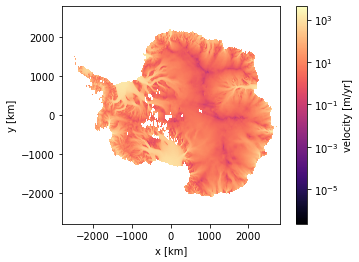

In [24]:
# plot velocity at continental scale
plt.imshow(V_mag, extent=[bounds[0]/1000,bounds[2]/1000,bounds[1]/1000,bounds[3]/1000],
           norm=LogNorm(), cmap='magma')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
cbar = plt.colorbar()
cbar.set_label('velocity [m/yr]')
plt.show()